# **Robot Learning – Reinforcement Learning**

The goal of this practical exercise is to implement a Reinforcement Learning algorithm to learn a policy that moves a robot to a goal position. The algorithm is the Q-learning algorithm.

## The Problem 
The problem consists in finding the goal in a finite 2D environment that is closed and contains some obstacles. 

**States and actions:** The size of the environment is 20x14=280 states. The robot can only do 4 different actions: {←, ↑, →, ↓} (not diagonal movements!). Therefore the size of the Q function will be 280x4=1120 cells.

**Dynamics:** The robot can be located in any free cell (not in the obstacle cells!). The function that describes the dynamics is very simple: the robot will move ONE cell per iteration to the direction of the action that we select, unless there is an obstacle or the wall in front of it, in which case it will
stay in the same position.

**Reinforcement function:** Since the goal is to reach the goal position as fast as possible, the reinforcement function will give -1 in all cells except in the goal cell, where the reward will be +1. The cell that contains the goal is (3,17).

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random
import copy 
from PIL import Image 

(14, 20)


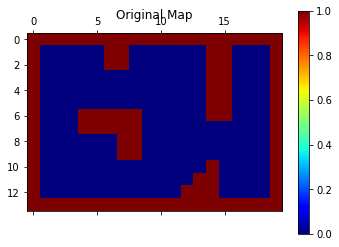

In [ ]:
map=[                                                              # the map
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

# Convert Map 2D array to Numpy array
map = np.array(map)
print (map.shape)

# Show grid map
plt.matshow(map, cmap = "jet")
plt.title('Original Map')
plt.colorbar()

map_rows, map_columns = map.shape
#print (map[1])

goal = (3,18)                                                       # the goal 

## Algorithm

In order to implement the Q-learning algorithm, you should follow the next pseudocode:

*Initialize Q(s,a) to “0”*

>*For n episodes*

>>*Initialize s randomly in any free cell*

>>*For m iterations repeat*

>>>*Choose a following ε-greedy policy*

>>>*Take action a, observe r, s’*

>>>*Q(s,a)←Q(s,a) + α ( r + γ · maxQ_a’(s’,a’)-Q(s,a))*

>>>*s←s’*

>>>*if the goal is achieved then finish the episode*

>>*endFor*

*endFor*


You will have to set several parameters experimentally: n, m, ε, α and γ.




## Environment
Actions & Rewards 

In the environment class, you set the possible actions, the rewards obtained depending of those actions and the state of the agent after the action is applied.


[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.
 -100. -100. -100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100. -100.   -1.   -1.   -1.   -1.
   -1.   -1. -100. -100.   -1.   -1.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100. -100.   -1.   -1.   -1.   -1.
   -1.   -1. -100. -100.   -1.   -1.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   -1. -100. -100.   -1.   -1.  100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   -1. -100. -100.   -1.   -1.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   -1. -100. -100.   -1.   -1.   -1. -100.]
[-100.   -1.   -1.   -1. -100. -100. -100. -100. -100.   -1.   -1.   -1.
   -1.   -1. -100. -100.   -1.   -1.   -1. -100.]
[-100.   -1.   -1.   -1. -100. -100. -100. -100. -100.   -1.   -1.   -1.
   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1.   -

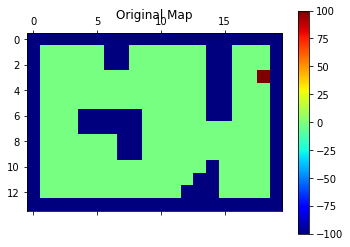

In [ ]:
q_values = np.zeros((map_rows, map_columns, 4)) #initialize q values by zeros 
actions = ['up', 'down', 'left', 'right'] #possible actions
#-----------------------------------------------------------------------------------------------------
#Create a 2D numpy array to hold the rewards for each state. 

rewards = np.full((map_rows, map_columns), -100.)  #for borders and obstacles -100
free_space = {}
for i in range(map_rows):
  for j in range(map_columns):
    if map[i,j]==0:
      rewards[i, j] = -1.                         # for free space -1


rewards[goal[0], goal[1]] = 100                   #for the goal to 100

#print rewards matrix
for row in rewards:
  print(row)

plt.matshow(np.array(rewards), cmap = "jet")
plt.title('Original Map')
plt.colorbar()

##Helper Functions

In [ ]:
#a function that determines if the specified location is a terminal state
def check_obstacles(current_row_index, current_column_index):
   if rewards[current_row_index, current_column_index] == -1.:
    return False
   else:
    return True

#-------------------------------------------------------------------------------------------
# start the agent in a random position within the map
def get_start():
  current_row_index = np.random.randint(map_rows)
  current_column_index = np.random.randint(map_columns)
  #continue choosing until the chosen state is a free space 
  while check_obstacles(current_row_index, current_column_index): 
    current_row_index = np.random.randint(map_rows)
    current_column_index = np.random.randint(map_columns)
  return current_row_index, current_column_index

#-------------------------------------------------------------------------------------------
# Epsilon greedy policy (choose a random action with probability epsilon)
def epsilon_greedy_policy(current_row_index, current_column_index, epsilon):
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)

#-------------------------------------------------------------------------------------------
# this function applies the action taken and returns the next state
#get_next_location_index
def step(current_row_index, current_column_index, action_index):
  new_row_index, new_column_index = current_row_index , current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'down' and current_row_index < map_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'right' and current_column_index < map_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

#-------------------------------------------------------------------------------------------
def value_function(): 
  """Retrieve the optimal value function from from Q(s,a)"""
  v = np.max(q_values, axis = 2)
  v[map==1]=-np.inf
  v[goal[0], goal[1]] =100
  return v

#-------------------------------------------------------------------------------------------
def get_optimal_policy(): 
    """Retrieve the optimal policy from Q(s,a)"""
    policy = np.argmax(q_values, axis = 2)
    policy[map == 1] = -2
    policy[goal[0], goal[1]] = -2
    return policy

#-------------------------------------------------------------------------------------------
#a function that will get the shortest path  
def get_shortest_path_New(start_row_index, start_column_index):
  if check_obstacles(start_row_index, start_column_index):
    return []
  else: 
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    while not check_obstacles(current_row_index, current_column_index):
      action_index = epsilon_greedy_policy(current_row_index, current_column_index, 1)       #get the best action (up,right and soon) 
      current_row_index, current_column_index = step(current_row_index, current_column_index, action_index) # what is the ID index of next action 
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path
 


## QLearning algorithm

QLearning class creates and trains the policy at every episode using the information provided by the environment. After the training is over, the optimal policy and the value function are obtained.

As in the MapEnv class, you have to fill the empty functions following the previous pseudocode.

In [ ]:

def episode(alpha, epsilon): 
    # Episode execution for n_iterations. Generate an action with epsilon_greedy_policy, 
    row_index, column_index = get_start()
    current_reward=0
    action_index = epsilon_greedy_policy(row_index, column_index, epsilon)
    if not check_obstacles(row_index, column_index):
        old_row_index, old_column_index = row_index, column_index               #store the old row and column indexes
        row_index, column_index = step(row_index, column_index, action_index)   #get next action state
        reward = rewards[row_index, column_index]                               #calculate the step reward
        old_q_value = q_values[old_row_index, old_column_index, action_index]   #get the prev state q value
        #update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (Alpha * ( reward + (gamma * np.max(q_values[row_index, column_index])) - old_q_value))
        q_values[old_row_index, old_column_index, action_index] = new_q_value
        current_reward=current_reward+reward                                    #Accumulated reward for steps in the episode
    return reward 

#--------------------------------------------------------------------------------------------------------------------------------------------
def train(check_every_n_episodes=200, average_n_episodes=20): 
    """Execute n_episodes and every 200 episodes stop training in order to retrieve 
        the average reward for 100 episodes, then resume training"""

    accumulated_rewards = []
    for i in range(22000):  
        episode(Alpha, epsilon)
        if i % check_every_n_episodes == 0:
            accum_reward = 0
            for j in range(average_n_episodes): 
                total_reward =episode(Alpha, epsilon)
                accum_reward += total_reward
            accumulated_rewards.append(accum_reward / average_n_episodes)
            print(accumulated_rewards[-1], end=" ")
    print ("Training Is Done ")
    return accumulated_rewards

## Training
For the training you need to choose some parameters experimentally. Uncomment the parameters and test different values to see how the training results change.

Parameters:

*alpha*: learning rate of the algorithm

*gamma*: discount factor of the algorithm

*epsilon*: random action probability

*n_episodes*: number of episode repetitions

*n_iterations*: number of iterations per episode

-12.314285714285715 -13.67142857142857 -3.742857142857143 -6.628571428571429 -5.242857142857143 -0.9428571428571428 -3.8 -2.414285714285714 -2.414285714285714 0.4714285714285714 0.44285714285714284 -2.414285714285714 -5.242857142857143 0.44285714285714284 -1.0 -2.414285714285714 -3.8285714285714287 -1.0 -0.9714285714285714 -2.414285714285714 -3.8285714285714287 -1.0 0.44285714285714284 0.4714285714285714 -2.414285714285714 -3.8285714285714287 4.771428571428571 -0.9714285714285714 -1.0 -1.0 -2.3857142857142857 -0.9714285714285714 -2.414285714285714 -1.0 -2.414285714285714 -5.214285714285714 -2.3857142857142857 1.9142857142857144 0.44285714285714284 -1.0 0.44285714285714284 -1.0 0.44285714285714284 -2.3857142857142857 1.8857142857142857 -3.8 3.3285714285714287 -1.0 0.44285714285714284 0.44285714285714284 -0.9714285714285714 1.9142857142857144 -1.0 0.44285714285714284 0.44285714285714284 -2.414285714285714 -0.9714285714285714 -2.414285714285714 -3.8 0.44285714285714284 -3.8285714285714287

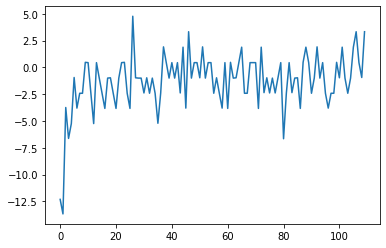

In [ ]:
#HyperParameters 
epsilon = 0.9
gamma = 0.9
Alpha = 0.85

#--------------------------------------------------------------------------------------------------------------------------------------------
Q= train(check_every_n_episodes=200, average_n_episodes=70)
plt.plot(Q) 

## Plot value function and optimal policy

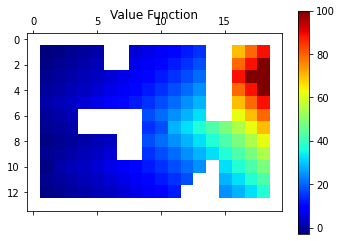

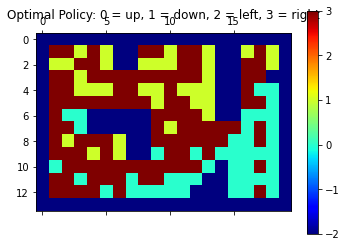

In [ ]:
v=value_function()
plt.matshow(v, cmap = "jet")
plt.title('Value Function')
plt.colorbar()

policy = get_optimal_policy()
plt.matshow(policy, cmap = "jet")
plt.title('Optimal Policy: 0 = up, 1 = down, 2 = left, 3 = right')
plt.colorbar()


path:  [[4, 10], [4, 11], [5, 11], [5, 12], [6, 12], [6, 13], [7, 13], [7, 14], [7, 15], [7, 16], [6, 16], [5, 16], [5, 17], [5, 18], [4, 18], [3, 18]]


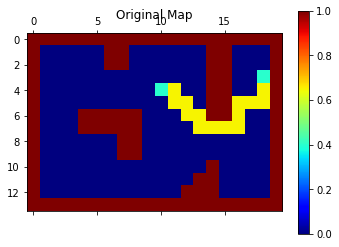

In [ ]:
#display a few shortest paths
start = (4,10)
path = get_shortest_path_New(start[0], start[1]) 
print ('path: ',path )
 
 # Show grid map
out_map = map.astype(np.float32)

for p in path:
  out_map[p[0],p[1]] = 0.65
out_map[start[0],start[1]] = 0.4
out_map[goal[0],goal[1]] = 0.4

plt.matshow(out_map, cmap = "jet")
plt.title('Original Map')
plt.colorbar()
